In [1]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=af2f69efeac5443e636b4d7a5d70186272e4d7c24aab8add836aa2b46de02985
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=3a199dc3018d9428d324d58c55291106235150244eaeea608d1cf043e16f2843
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [39]:
from pandas._libs import missing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from google.colab import drive
from sqlalchemy import true
from sklearn.decomposition import PCA
import numpy as np
from keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from fancyimpute import IterativeImputer as MI
from sre_constants import error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

In [3]:
df=pd.read_csv("All_MTG_decks_for_land_prediction.csv")

In [4]:
df

,Deck hyperlink,Total maindeck cards,Lands (without MDFCs),Average mana value (counting land/spell MDFCs as spells),Nonmythic land/spell MDFCs,Mythic land/spell MDFCs,Total land/spell MDFCs,Cheap card draw,Cheap mana prod,Sum of cheap card draw and cheap mana prod,Date of event,Format,Companion (based on sideboard inclusion),Companion present (1 or 0),Wins,Losses,Wins minus losses,Number of lands (incl partial MDFCs)
0,https://mtgmelee.com/Decklist/View/29181,60.0,28.0,3.750000,0.0,0.0,0.0,8.0,0.0,8.0,2020-07-01,Standard,NaN,0.0,2.0,1.0,1.0,28.0
1,https://mtgmelee.com/Decklist/View/29188,60.0,28.0,3.937500,0.0,0.0,0.0,4.0,4.0,8.0,2020-07-01,Standard,NaN,0.0,4.0,0.0,4.0,28.0
2,https://mtgmelee.com/Decklist/View/29190,60.0,26.0,3.382353,0.0,0.0,0.0,4.0,0.0,4.0,2020-07-01,Standard,NaN,0.0,3.0,1.0,2.0,26.0
3,https://mtgmelee.com/Decklist/View/29197,60.0,28.0,3.687500,0.0,0.0,0.0,4.0,0.0,4.0,2020-07-04,Standard,NaN,0.0,3.0,2.0,1.0,28.0
4,https://mtgmelee.com/Decklist/View/29211,60.0,29.0,3.709677,0.0,0.0,0.0,4.0,0.0,4.0,2020-07-01,Standard,NaN,0.0,2.0,1.0,1.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95138,https://magic.wizards.com/en/articles/archive/...,60.0,20.0,1.600000,0.0,0.0,0.0,6.0,2.0,8.0,2022-07-01,Modern,NaN,0.0,5.0,0.0,5.0,20.0
95139,https://magic.wizards.com/en/articles/archive/...,60.0,22.0,2.342105,0.0,0.0,0.0,0.0,8.0,8.0,2022-07-01,Modern,NaN,0.0,5.0,0.0,5.0,22.0
95140,https://magic.wizards.com/en/articles/archive/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95141,https://magic.wizards.com/en/articles/archive/...,60.0,20.0,1.775000,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-01,Modern,NaN,0.0,5.0,0.0,5.0,20.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Deck hyperlink                                            95143 non-null  object 
 1   Total maindeck cards                                      89671 non-null  float64
 2   Lands (without MDFCs)                                     89671 non-null  float64
 3   Average mana value (counting land/spell MDFCs as spells)  89671 non-null  float64
 4   Nonmythic land/spell MDFCs                                89671 non-null  float64
 5   Mythic land/spell MDFCs                                   89671 non-null  float64
 6   Total land/spell MDFCs                                    89671 non-null  float64
 7   Cheap card draw                                           89671 non-null  float64
 8   Cheap mana prod 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total maindeck cards,89671.0,60.000000,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000
Lands (without MDFCs),89671.0,21.991625,3.390165,11.000000,20.000000,22.000000,24.000000,38.000000
Average mana value (counting land/spell MDFCs as spells),89671.0,2.476434,0.687313,0.545455,2.026316,2.452381,2.923077,5.926829
Nonmythic land/spell MDFCs,89671.0,0.724872,1.702599,0.000000,0.000000,0.000000,0.000000,13.000000
Mythic land/spell MDFCs,89671.0,0.475471,1.139788,0.000000,0.000000,0.000000,0.000000,10.000000
Total land/spell MDFCs,89671.0,1.200343,2.311288,0.000000,0.000000,0.000000,1.000000,17.000000
Cheap card draw,89671.0,4.164914,4.665574,0.000000,0.000000,4.000000,7.000000,19.000000
Cheap mana prod,89671.0,1.854267,3.487411,0.000000,0.000000,0.000000,4.000000,24.000000
Sum of cheap card draw and cheap mana prod,89671.0,6.019181,5.494244,0.000000,1.000000,4.000000,9.000000,35.000000
Companion present (1 or 0),89671.0,0.095192,0.293482,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
df.isnull().sum()

Deck hyperlink                                                  0
Total maindeck cards                                         5472
Lands (without MDFCs)                                        5472
Average mana value (counting land/spell MDFCs as spells)     5472
Nonmythic land/spell MDFCs                                   5472
Mythic land/spell MDFCs                                      5472
Total land/spell MDFCs                                       5472
Cheap card draw                                              5472
Cheap mana prod                                              5472
Sum of cheap card draw and cheap mana prod                   5472
Date of event                                                5472
Format                                                       5472
Companion (based on sideboard inclusion)                    86607
Companion present (1 or 0)                                   5472
Wins                                                         5472
Losses    

<ipython-input-8-db2e3791caf4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8,square=True,


<Axes: title={'center': 'Corr. Pearson'}>

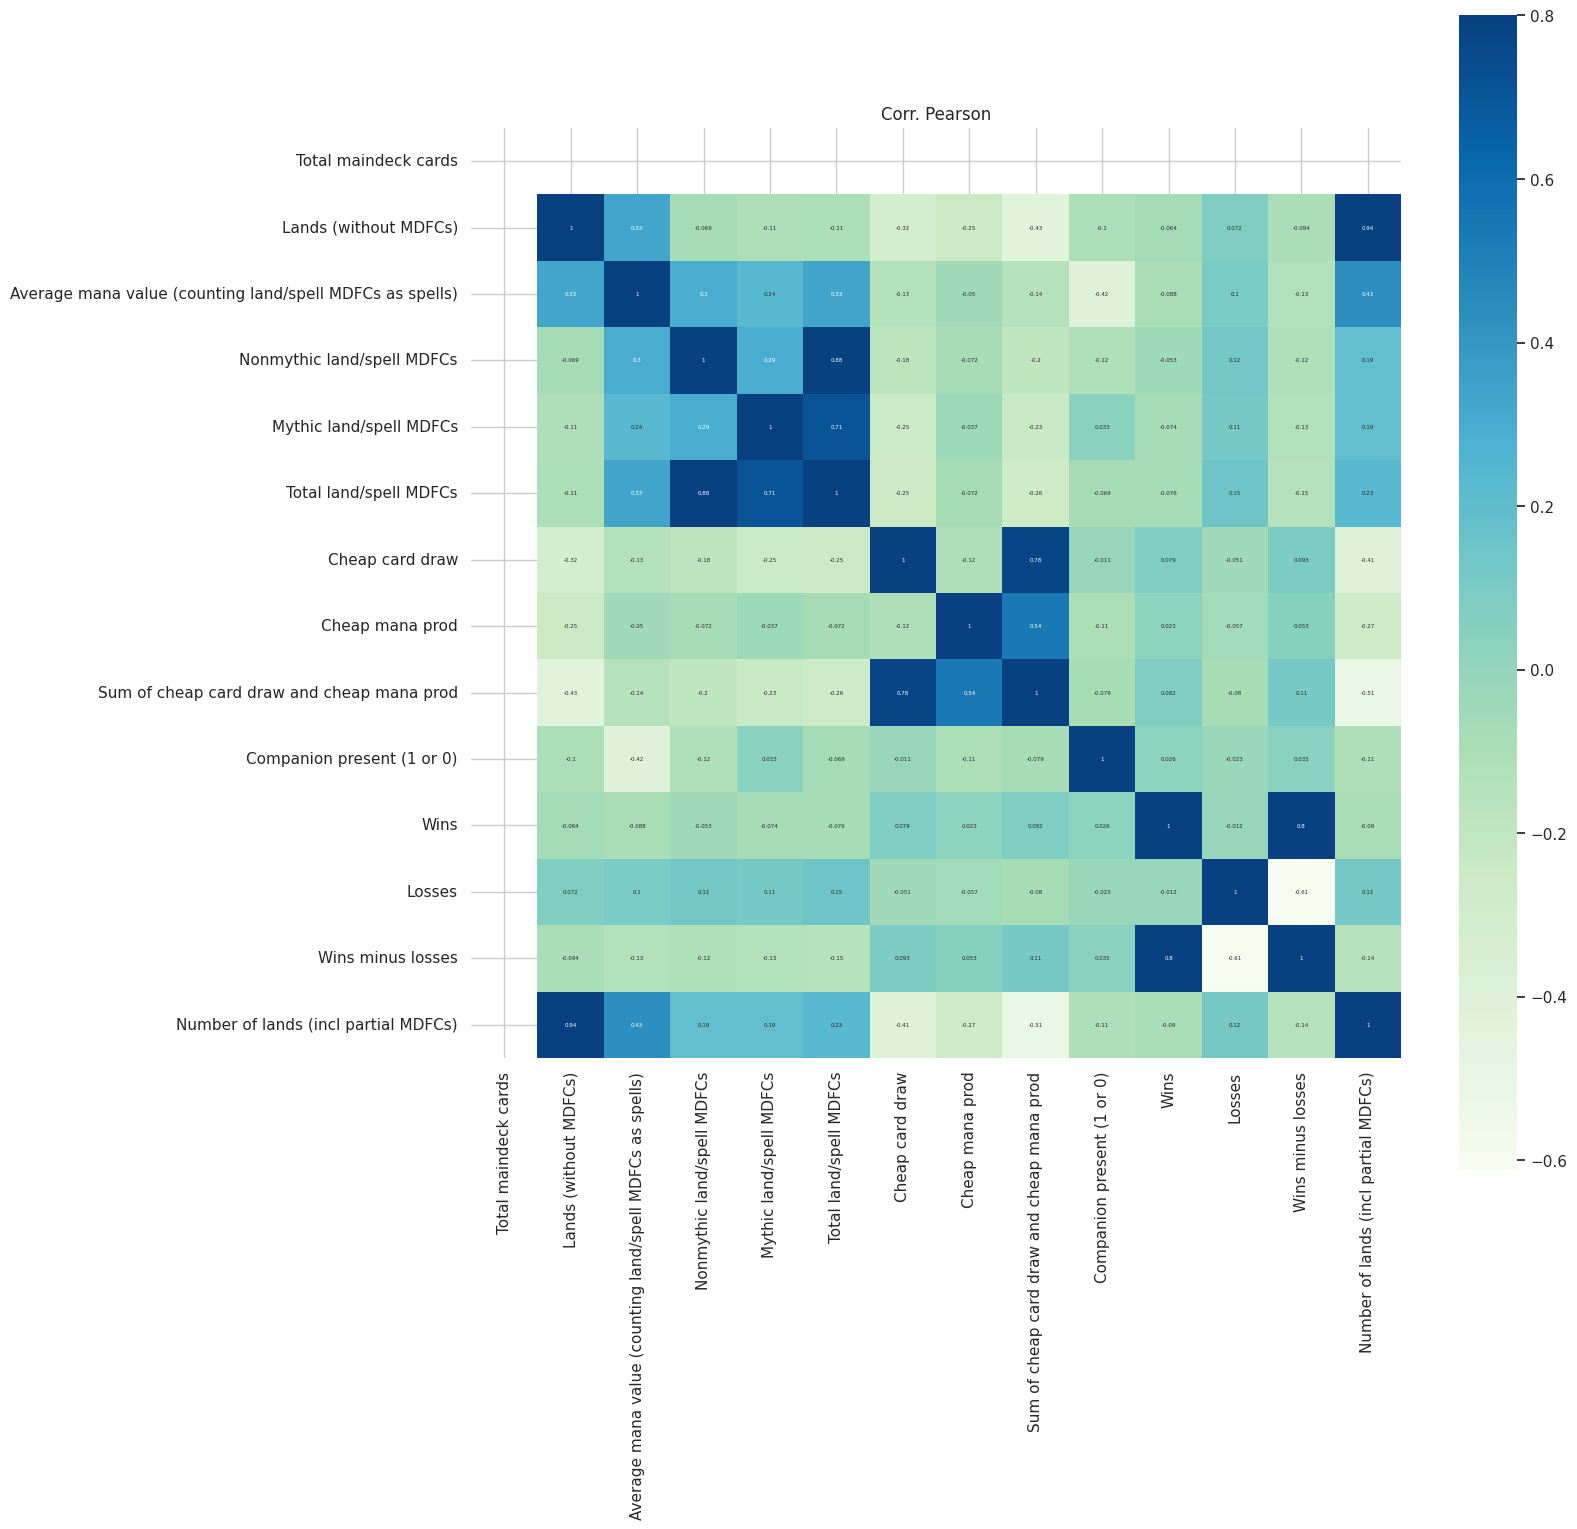

In [8]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Corr. Pearson")
sns.heatmap(df.corr(),vmax=0.8,square=True,
            cmap="GnBu",linecolor='r',
            annot=True,annot_kws={'size':4})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Deck hyperlink                                            95143 non-null  object 
 1   Total maindeck cards                                      89671 non-null  float64
 2   Lands (without MDFCs)                                     89671 non-null  float64
 3   Average mana value (counting land/spell MDFCs as spells)  89671 non-null  float64
 4   Nonmythic land/spell MDFCs                                89671 non-null  float64
 5   Mythic land/spell MDFCs                                   89671 non-null  float64
 6   Total land/spell MDFCs                                    89671 non-null  float64
 7   Cheap card draw                                           89671 non-null  float64
 8   Cheap mana prod 

In [10]:
df=df.drop(['Total maindeck cards'],axis=1)
df=df.drop(['Lands (without MDFCs)'],axis=1)
df=df.drop(['Wins'],axis=1)
df=df.drop(['Deck hyperlink'],axis=1)
df=df.drop(['Companion (based on sideboard inclusion)'],axis=1)

In [11]:
df['Date of event'] = pd.to_datetime(df['Date of event'])
df['year'] = df['Date of event'].apply(lambda date:date.year)
df['month'] = df['Date of event'].apply(lambda date:date.month)
df = df.drop(['Date of event'],axis=1)

In [12]:
df.isnull().sum()

Average mana value (counting land/spell MDFCs as spells)    5472
Nonmythic land/spell MDFCs                                  5472
Mythic land/spell MDFCs                                     5472
Total land/spell MDFCs                                      5472
Cheap card draw                                             5472
Cheap mana prod                                             5472
Sum of cheap card draw and cheap mana prod                  5472
Format                                                      5472
Companion present (1 or 0)                                  5472
Losses                                                      5472
Wins minus losses                                           5472
Number of lands (incl partial MDFCs)                        5472
year                                                        5472
month                                                       5472
dtype: int64

<Axes: >

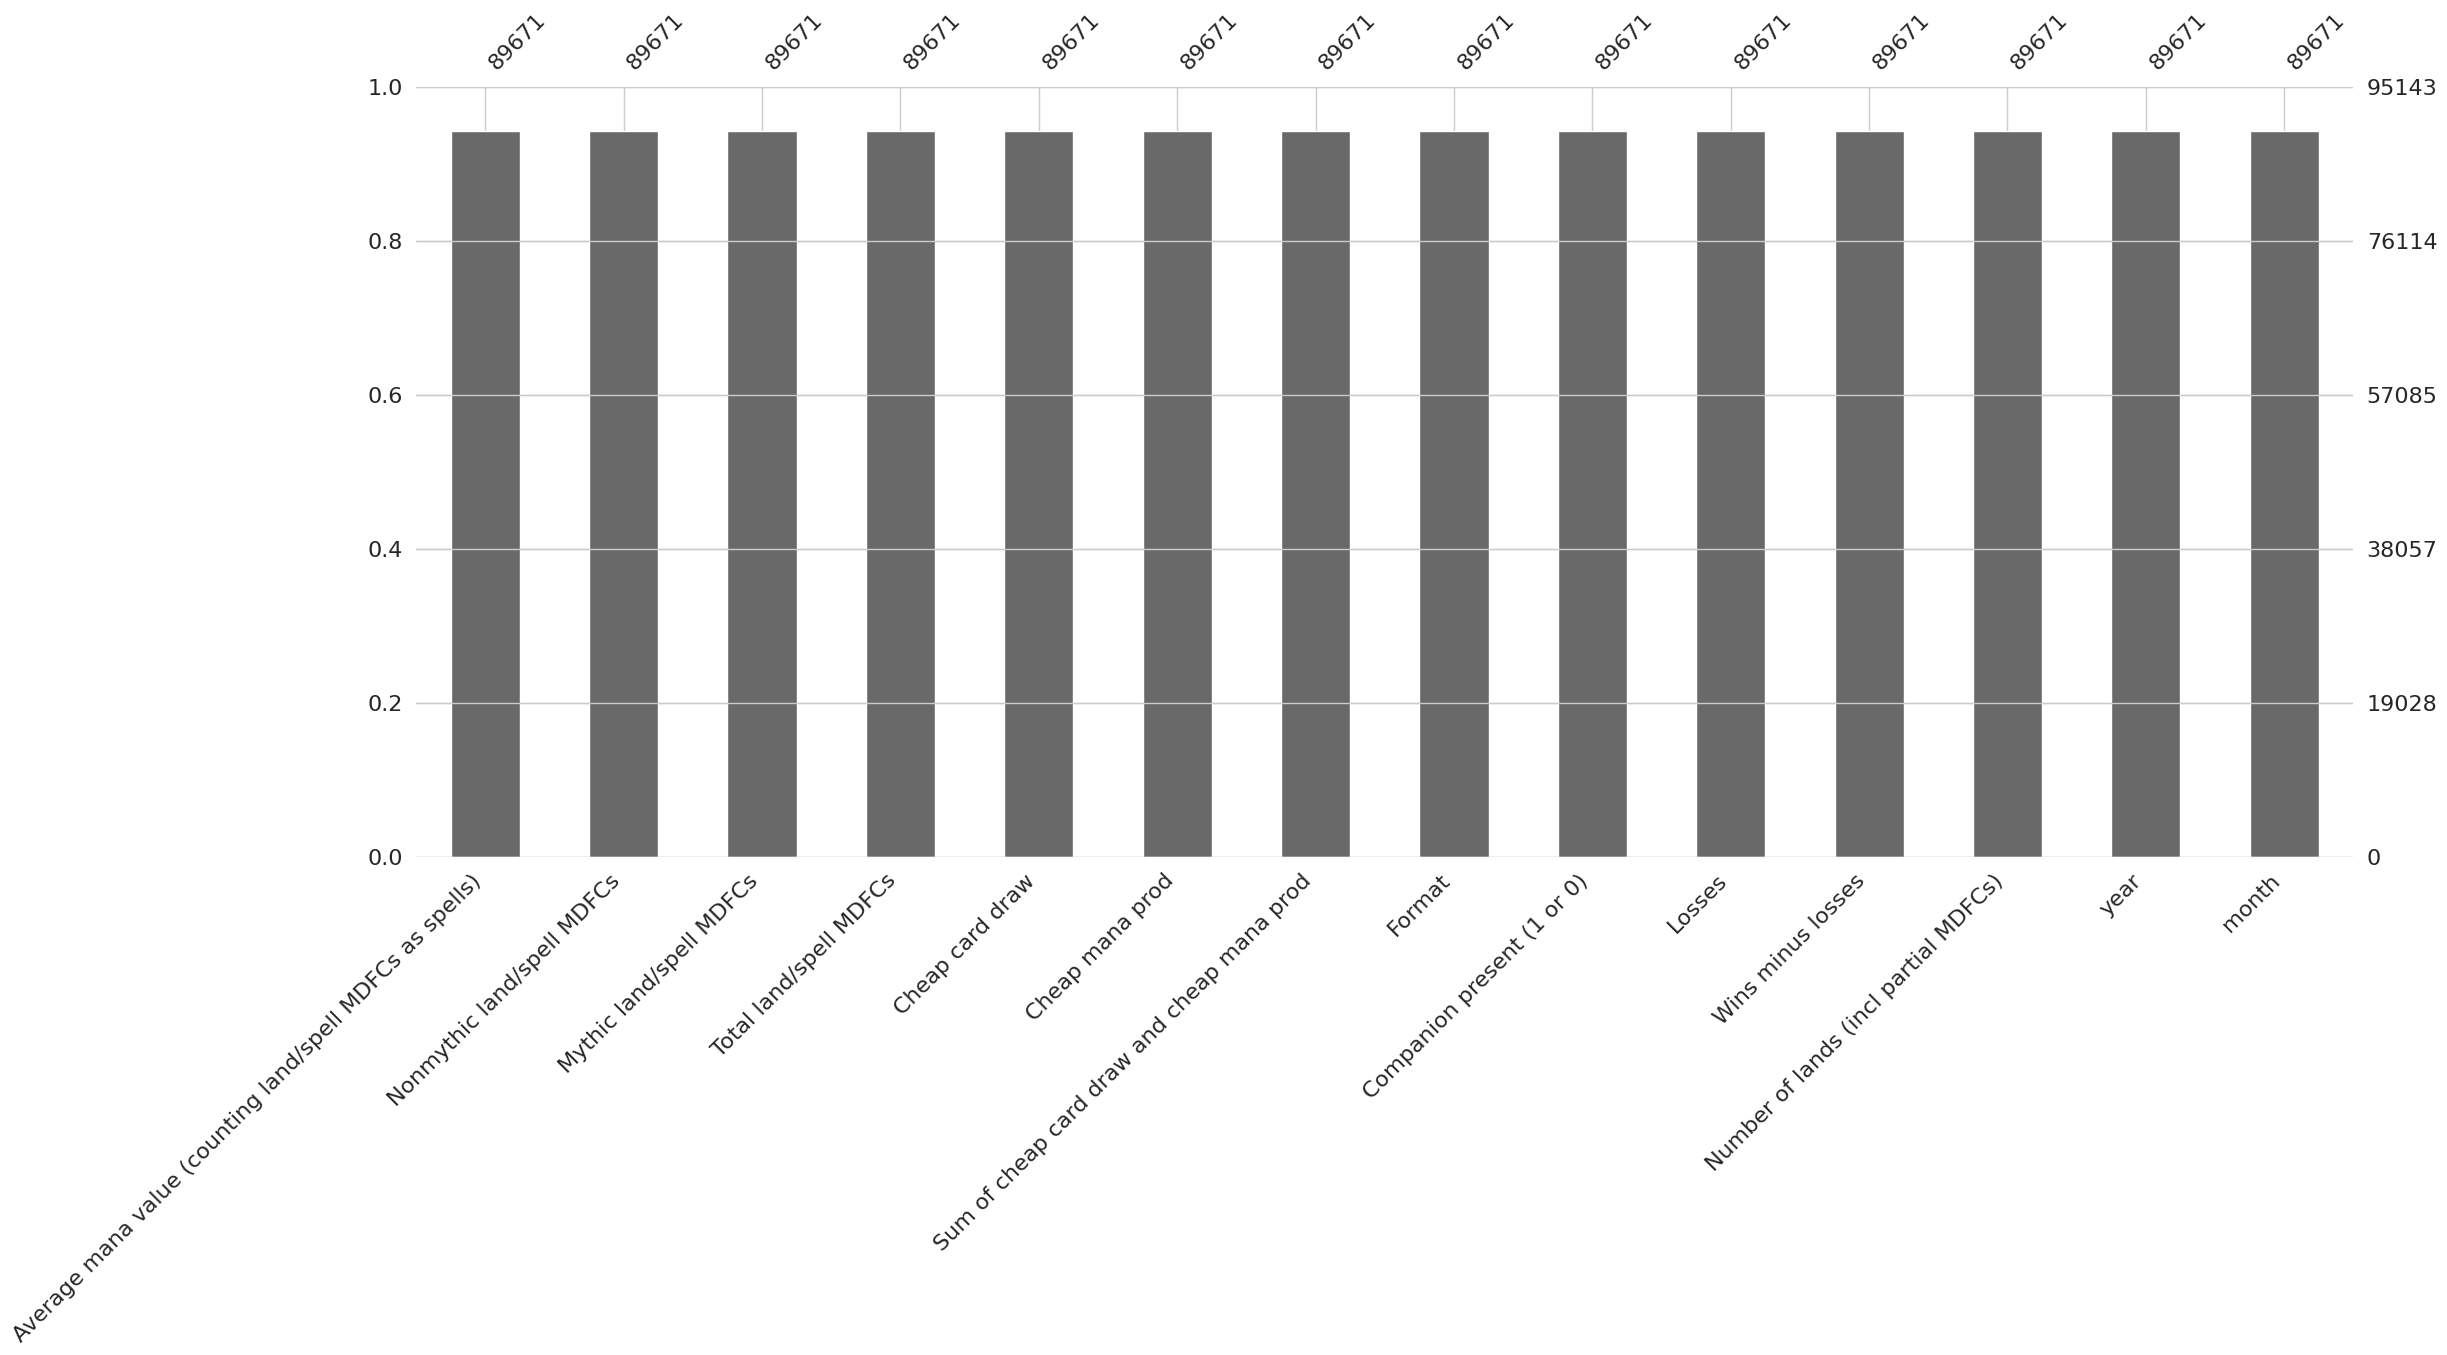

In [13]:
msno.bar(df)

<Axes: >

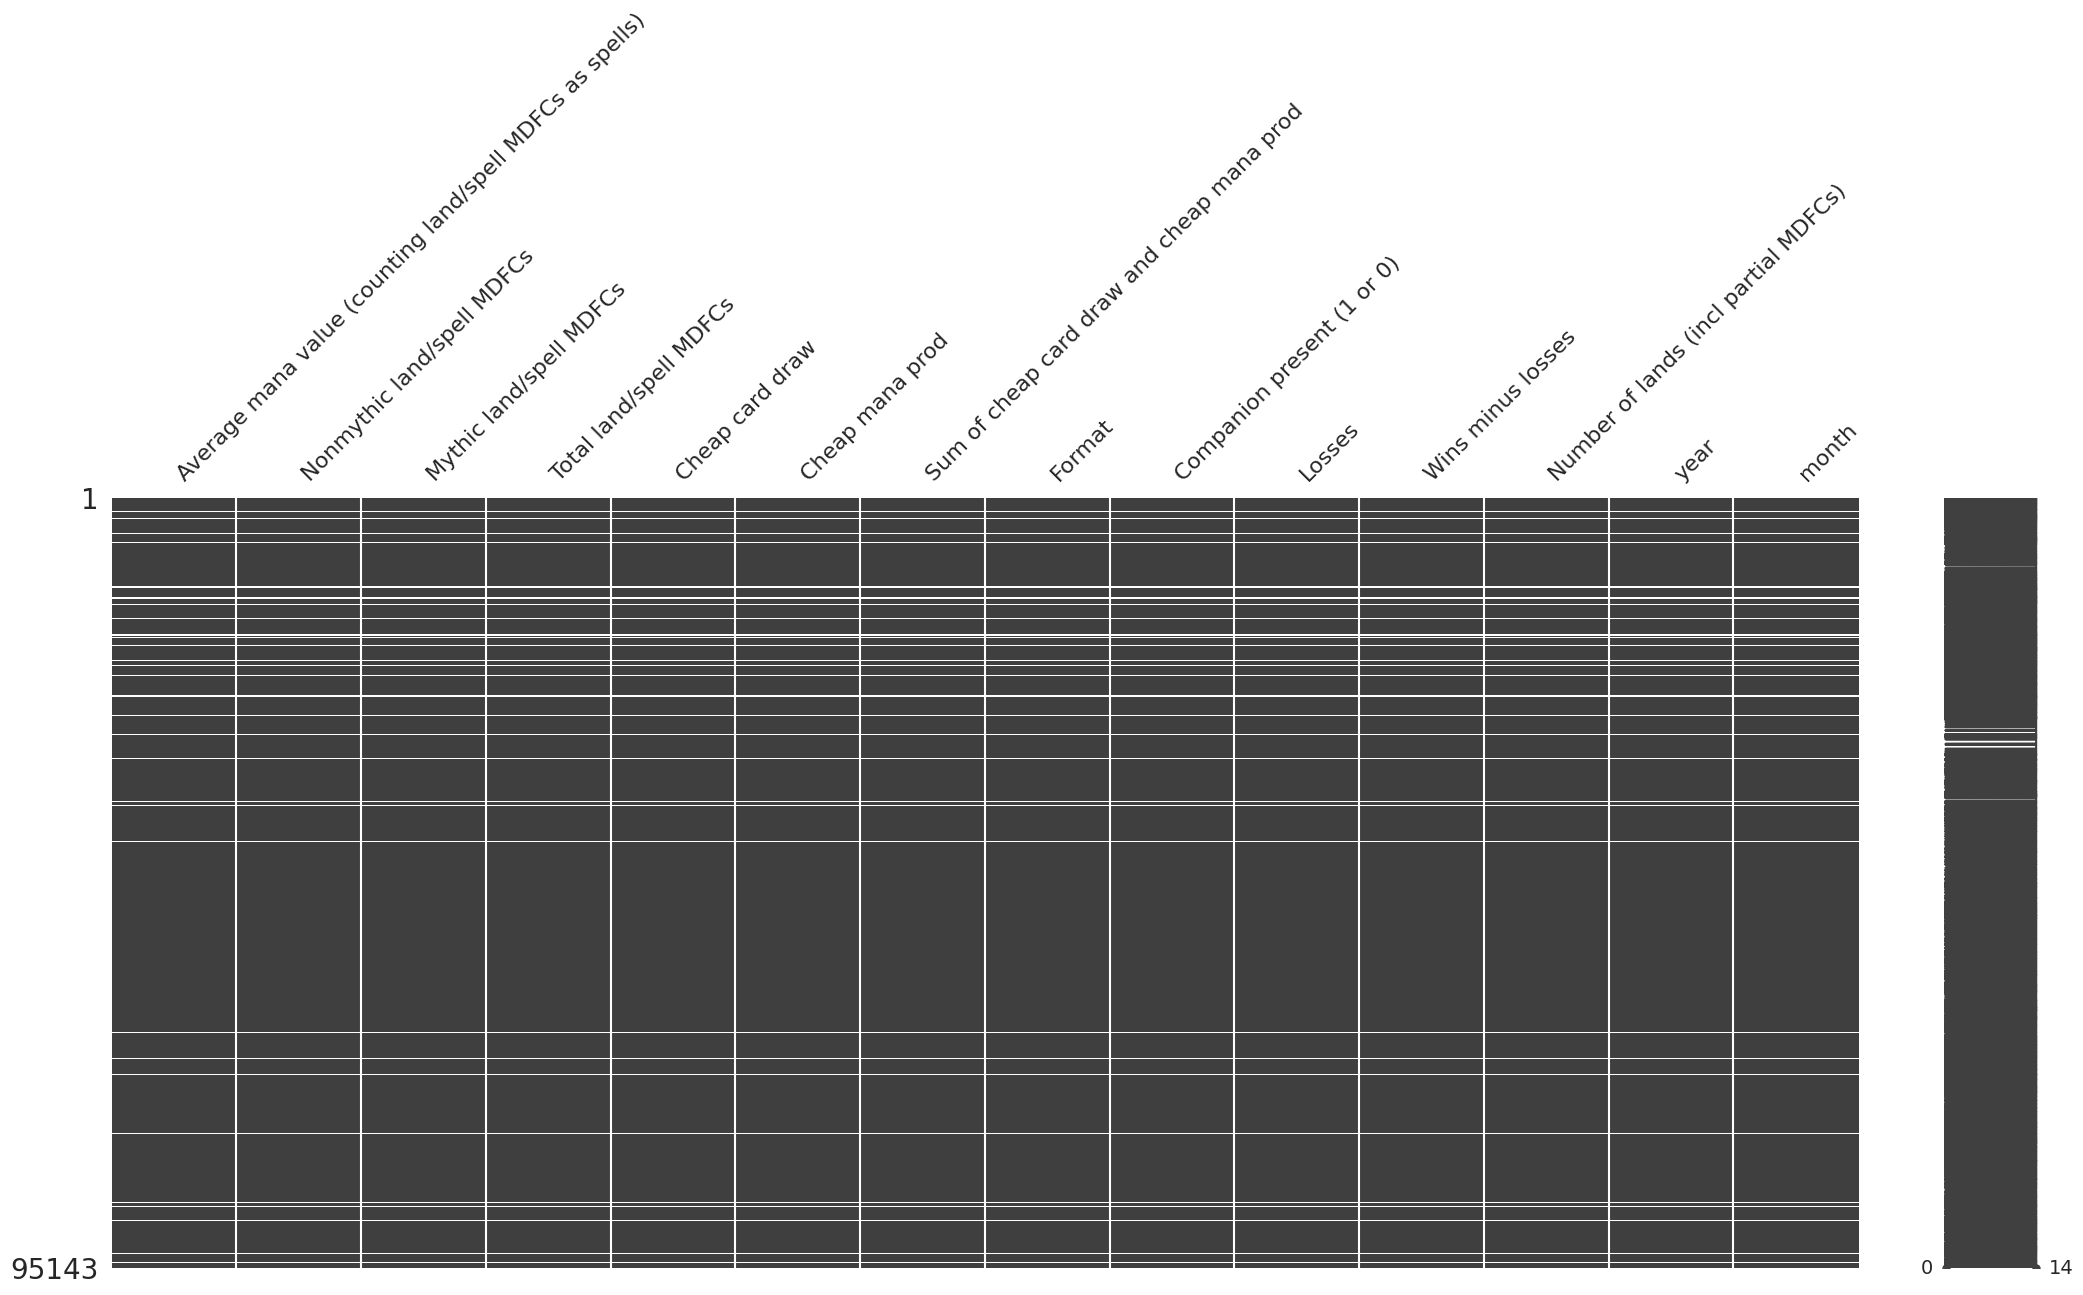

In [14]:
msno.matrix(df)

array([[<Axes: title={'center': 'Average mana value (counting land/spell MDFCs as spells)'}>,
        <Axes: title={'center': 'Nonmythic land/spell MDFCs'}>,
        <Axes: title={'center': 'Mythic land/spell MDFCs'}>,
        <Axes: title={'center': 'Total land/spell MDFCs'}>],
       [<Axes: title={'center': 'Cheap card draw'}>,
        <Axes: title={'center': 'Cheap mana prod'}>,
        <Axes: title={'center': 'Sum of cheap card draw and cheap mana prod'}>,
        <Axes: title={'center': 'Companion present (1 or 0)'}>],
       [<Axes: title={'center': 'Losses'}>,
        <Axes: title={'center': 'Wins minus losses'}>,
        <Axes: title={'center': 'Number of lands (incl partial MDFCs)'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

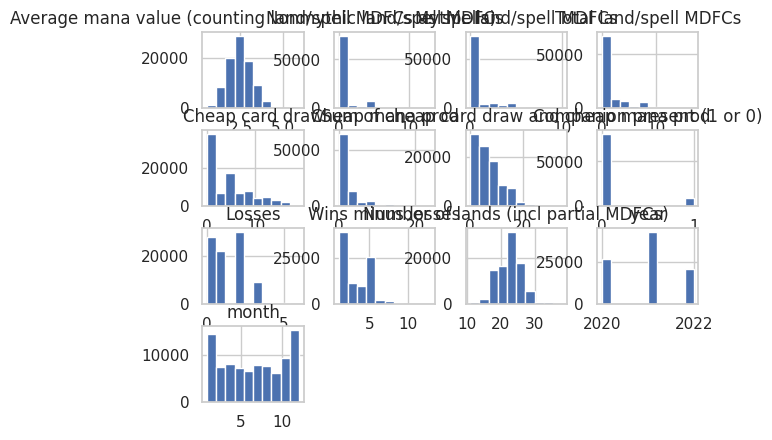

In [15]:
df.hist()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Average mana value (counting land/spell MDFCs as spells)  89671 non-null  float64
 1   Nonmythic land/spell MDFCs                                89671 non-null  float64
 2   Mythic land/spell MDFCs                                   89671 non-null  float64
 3   Total land/spell MDFCs                                    89671 non-null  float64
 4   Cheap card draw                                           89671 non-null  float64
 5   Cheap mana prod                                           89671 non-null  float64
 6   Sum of cheap card draw and cheap mana prod                89671 non-null  float64
 7   Format                                                    89671 non-null  object 
 8   Companion presen

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Average mana value (counting land/spell MDFCs as spells)  89671 non-null  float64
 1   Nonmythic land/spell MDFCs                                89671 non-null  float64
 2   Mythic land/spell MDFCs                                   89671 non-null  float64
 3   Total land/spell MDFCs                                    89671 non-null  float64
 4   Cheap card draw                                           89671 non-null  float64
 5   Cheap mana prod                                           89671 non-null  float64
 6   Sum of cheap card draw and cheap mana prod                89671 non-null  float64
 7   Format                                                    89671 non-null  object 
 8   Companion presen

In [18]:
le = LabelEncoder()
df['Format']=le.fit_transform(df['Format'])

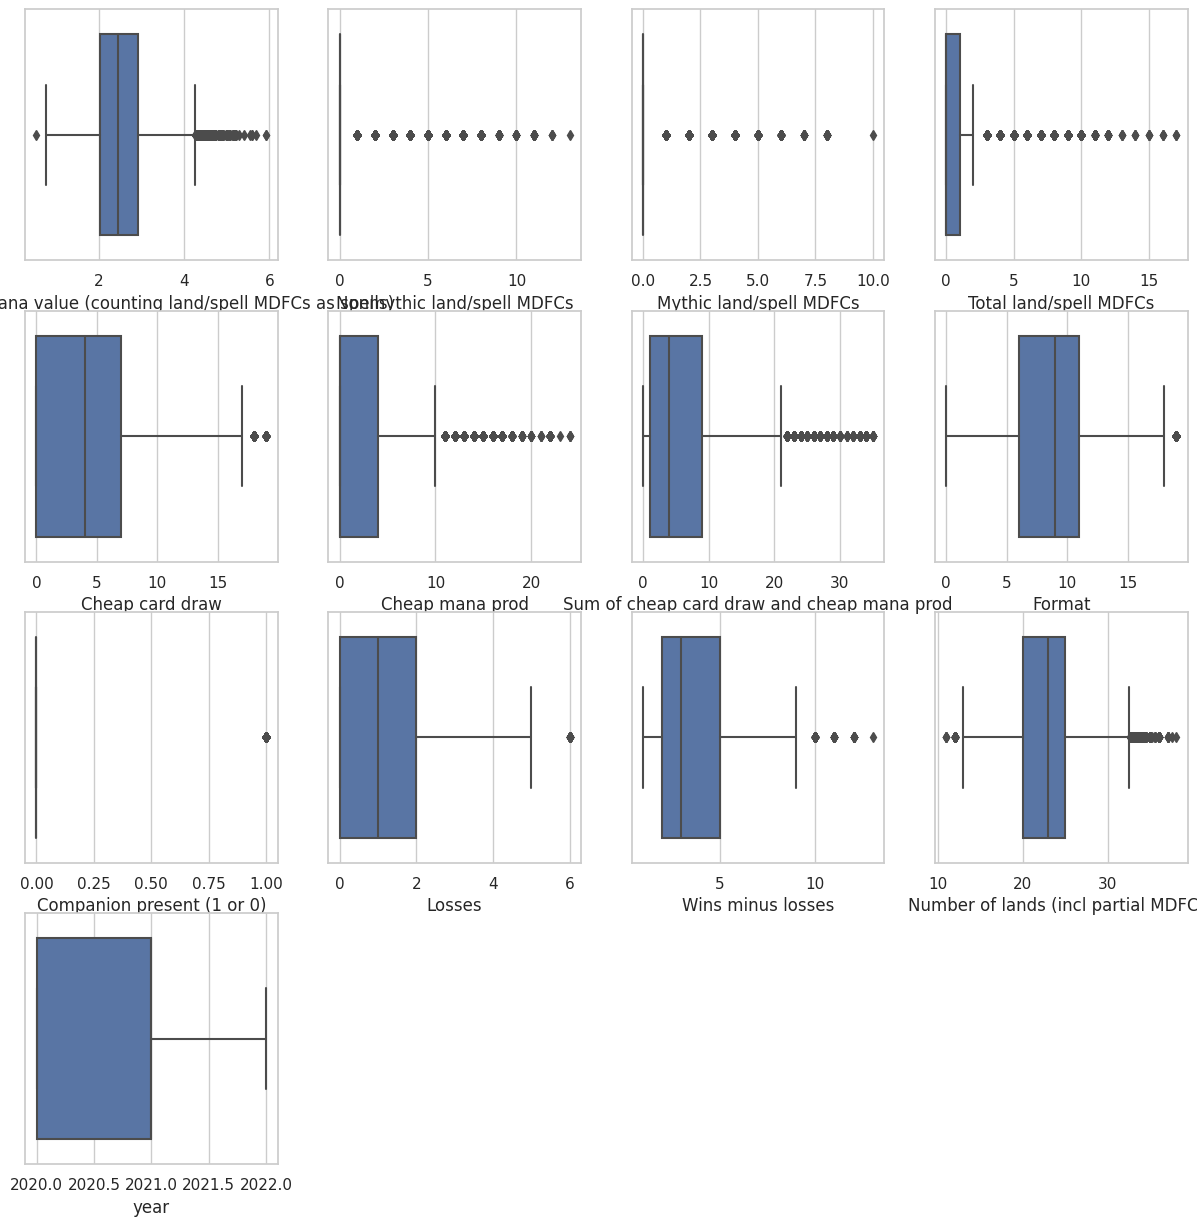

In [19]:
plt.figure(figsize=(15,15))
col =df.columns[:-1]
for i in enumerate(col):
  plt.subplot(4,4,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [20]:
for i in col:
  q1 = df[i].quantile(0.10)
  q4 = df[i].quantile(0.90)
  df[i][df[i]<=q1] = q1
  df[i][df[i]>=q4] = q4

<ipython-input-20-270797681709>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-20-270797681709>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] = q4
<ipython-input-20-270797681709>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-20-270797681709>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

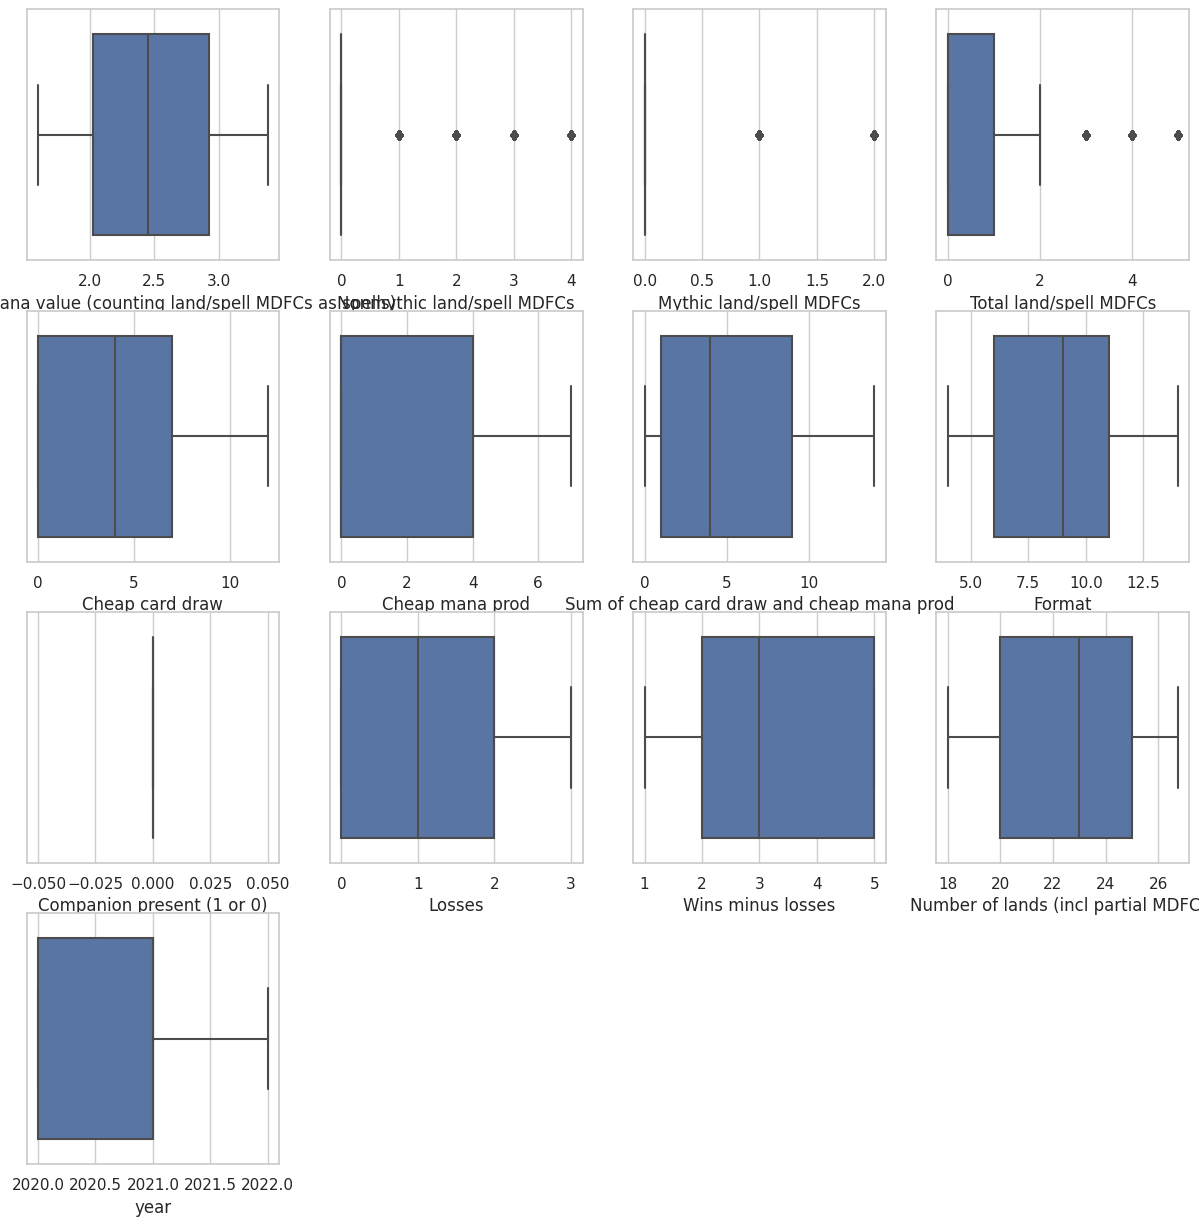

In [21]:
plt.figure(figsize=(15,15))
col =df.columns[:-1]
for i in enumerate(col):
  plt.subplot(4,4,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [22]:
df=df.fillna(df.mean())

In [23]:
df.isnull().sum()

Average mana value (counting land/spell MDFCs as spells)    0
Nonmythic land/spell MDFCs                                  0
Mythic land/spell MDFCs                                     0
Total land/spell MDFCs                                      0
Cheap card draw                                             0
Cheap mana prod                                             0
Sum of cheap card draw and cheap mana prod                  0
Format                                                      0
Companion present (1 or 0)                                  0
Losses                                                      0
Wins minus losses                                           0
Number of lands (incl partial MDFCs)                        0
year                                                        0
month                                                       0
dtype: int64

In [24]:
X = df.drop('Number of lands (incl partial MDFCs)',axis=1)
y = df['Number of lands (incl partial MDFCs)']

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Average mana value (counting land/spell MDFCs as spells)  95143 non-null  float64
 1   Nonmythic land/spell MDFCs                                95143 non-null  float64
 2   Mythic land/spell MDFCs                                   95143 non-null  float64
 3   Total land/spell MDFCs                                    95143 non-null  float64
 4   Cheap card draw                                           95143 non-null  float64
 5   Cheap mana prod                                           95143 non-null  float64
 6   Sum of cheap card draw and cheap mana prod                95143 non-null  float64
 7   Format                                                    95143 non-null  int64  
 8   Companion presen

In [26]:
X

,Average mana value (counting land/spell MDFCs as spells),Nonmythic land/spell MDFCs,Mythic land/spell MDFCs,Total land/spell MDFCs,Cheap card draw,Cheap mana prod,Sum of cheap card draw and cheap mana prod,Format,Companion present (1 or 0),Losses,Wins minus losses,year,month
0,3.382353,0.000000,0.000000,0.000000,8.000000,0.000000,8.000000,11,0.0,1.000000,1.000000,2020.000000,7.00000
1,3.382353,0.000000,0.000000,0.000000,4.000000,4.000000,8.000000,11,0.0,0.000000,4.000000,2020.000000,7.00000
2,3.382353,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,11,0.0,1.000000,2.000000,2020.000000,7.00000
3,3.382353,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,11,0.0,2.000000,1.000000,2020.000000,7.00000
4,3.382353,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,11,0.0,1.000000,1.000000,2020.000000,7.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95138,1.600000,0.000000,0.000000,0.000000,6.000000,2.000000,8.000000,6,0.0,0.000000,5.000000,2022.000000,7.00000
95139,2.342105,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,6,0.0,0.000000,5.000000,2022.000000,7.00000
95140,2.470917,0.612517,0.321431,0.987577,3.951757,1.504243,5.686643,14,0.0,1.247248,3.135718,2020.935676,6.57808
95141,1.775000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,0.0,0.000000,5.000000,2022.000000,7.00000


<Axes: >

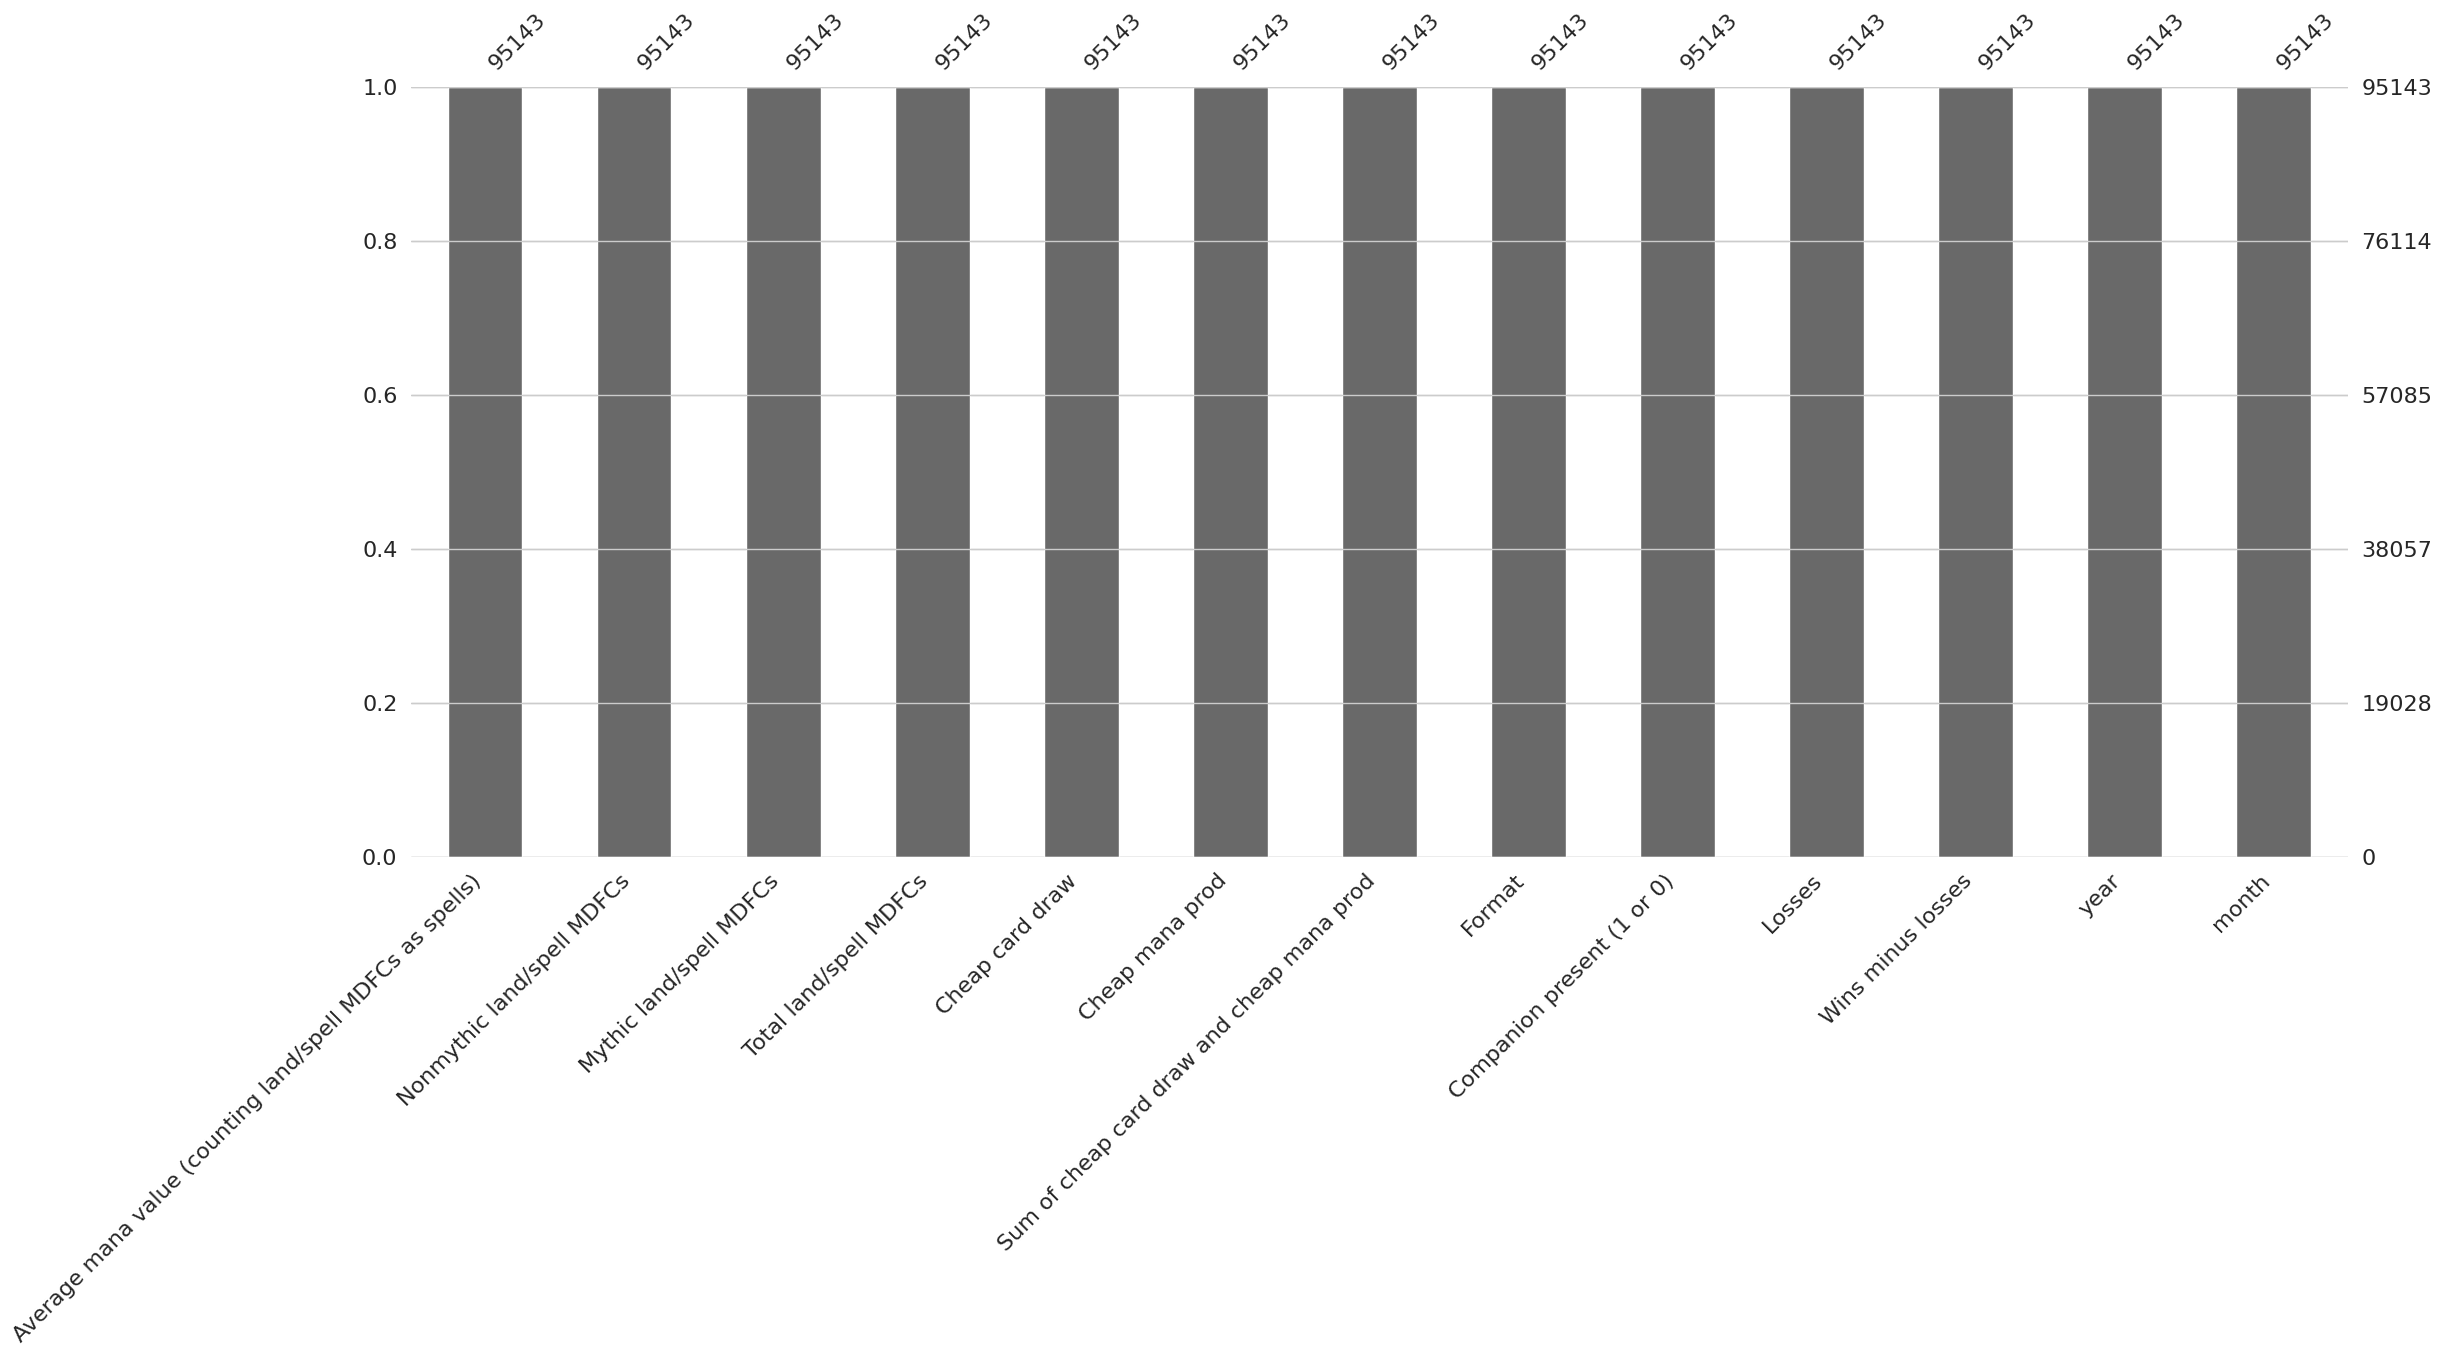

In [27]:
msno.bar(X)

In [28]:
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X)
X = scalerMinMax.transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1000,test_size=0.3)

## Modelo Neuronal

In [33]:
modelANN = Sequential()
modelANN.add(Dense(13,activation='relu'))
modelANN.add(Dense(6,activation='relu'))
modelANN.add(Dense(1,activation='relu'))
modelANN.compile(optimizer='adam',loss='mse')

In [34]:
modelANN.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=500, epochs=70,verbose=1)

Epoch 1/70
134/134 [==============================] - 1s 4ms/step - loss: 422.4323 - val_loss: 267.1379
Epoch 2/70
134/134 [==============================] - 0s 3ms/step - loss: 104.9592 - val_loss: 27.5134
Epoch 3/70
134/134 [==============================] - 0s 2ms/step - loss: 24.0566 - val_loss: 22.6532
Epoch 4/70
134/134 [==============================] - 0s 3ms/step - loss: 20.5246 - val_loss: 19.4234
Epoch 5/70
134/134 [==============================] - 0s 2ms/step - loss: 17.6287 - val_loss: 16.7525
Epoch 6/70
134/134 [==============================] - 0s 2ms/step - loss: 15.2955 - val_loss: 14.6466
Epoch 7/70
134/134 [==============================] - 0s 3ms/step - loss: 13.5055 - val_loss: 13.0599
Epoch 8/70
134/134 [==============================] - 0s 3ms/step - loss: 12.1681 - val_loss: 11.8847
Epoch 9/70
134/134 [==============================] - 0s 3ms/step - loss: 11.1755 - val_loss: 10.9989
Epoch 10/70
134/134 [==============================] - 0s 3ms/step - loss: 10.4

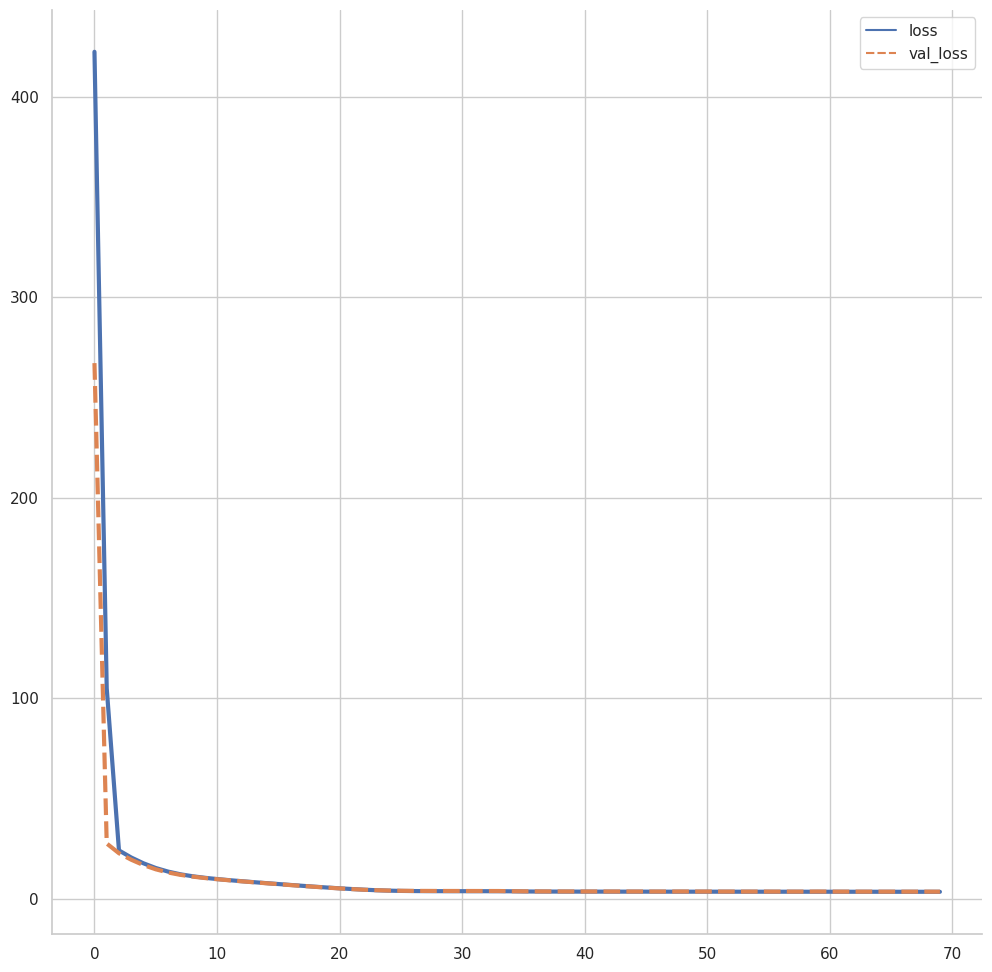

In [35]:
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()

## KNN

In [36]:
error = []
for i in range(1,10):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  p = knn.predict(X_test)
  error.append(np.mean(p!=y_test))

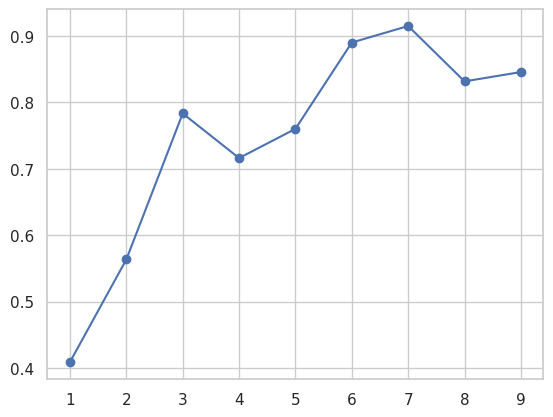

In [37]:
plt.plot(range(1,10),error,marker="o")

In [38]:
knn_model=KNeighborsRegressor(n_neighbors=3,metric="euclidean")#euclidean, manhatan, minkowski
knn_model.fit(X_train, y_train)
y_predict_knn_train = knn_model.predict(X_train)
y_predict_knn_test = knn_model.predict(X_test)
print(mean_absolute_error(y_train,y_predict_knn_train))
print(mean_absolute_error(y_test,y_predict_knn_test))

0.5347494685685689
0.823514919011083


##SVC

In [42]:
model_svr = SVR(kernel="linear").fit(X_train, y_train) #linear RBF sigmoid poly
print(model_svr.score(X_test,y_test))

0.4711227629702339


In [43]:
print(model_svr.score(X_train,y_train))

0.47951885988612375
